In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Amsterdam  = pd.read_csv('Amsterdam.csv')
Amsterdam = Amsterdam.drop(columns = ["Unnamed: 0.1", "Unnamed: 0"])

In [3]:
# Verificamos información del dataframe
Amsterdam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  9659 non-null   object 
 1   name                                          9659 non-null   object 
 2   host_name                                     9659 non-null   object 
 3   host_since                                    9659 non-null   object 
 4   host_response_time                            9659 non-null   object 
 5   host_response_rate                            9659 non-null   object 
 6   host_acceptance_rate                          9659 non-null   object 
 7   host_is_superhost                             9659 non-null   object 
 8   host_identity_verified                        9659 non-null   object 
 9   neighbourhood                                 9659 non-null   o

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Amsterdam['review_scores_rating'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9659 entries, 0 to 9658
Series name: review_scores_rating
Non-Null Count  Dtype  
--------------  -----  
9659 non-null   float64
dtypes: float64(1)
memory usage: 75.6 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Amsterdam['review_scores_rating'].max()
Min = Amsterdam['review_scores_rating'].min()
Limites = [Min, Max]
Limites

[4.5, 5.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

0.5

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 9659

ni = 1 + 3.32 * np.log10(n)
ni

14.229974791343807

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.035137096680182

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [11]:
# Categorización de variables
intervalos = np.linspace (4.5, 5.0, 15)
intervalos

array([4.5       , 4.53571429, 4.57142857, 4.60714286, 4.64285714,
       4.67857143, 4.71428571, 4.75      , 4.78571429, 4.82142857,
       4.85714286, 4.89285714, 4.92857143, 4.96428571, 5.        ])

In [12]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14" ]

In [13]:
# Creamos las ctegorias en la columna numerica
Amsterdam['review_scores_rating'] = pd.cut ( x = Amsterdam ['review_scores_rating'], bins = intervalos, labels = categorias )
Amsterdam['review_scores_rating']

0       Categoria10
1        Categoria9
2        Categoria6
3       Categoria14
4        Categoria4
           ...     
9654     Categoria9
9655     Categoria9
9656    Categoria14
9657     Categoria9
9658     Categoria9
Name: review_scores_rating, Length: 9659, dtype: category
Categories (14, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria11' < 'Categoria12' < 'Categoria13' < 'Categoria14']

In [14]:
table1 = freq_tbl(Amsterdam['review_scores_rating'])
table1

,review_scores_rating,frequency,percentage,cumulative_perc
0,Categoria14,3528,0.365255,0.371017
1,Categoria9,1530,0.158401,0.531917
2,Categoria12,1102,0.114090,0.647807
3,Categoria11,755,0.078165,0.727206
4,Categoria13,637,0.065949,0.794195
5,Categoria10,445,0.046071,0.840993
6,Categoria7,402,0.041619,0.883268
7,Categoria6,230,0.023812,0.907456
8,Categoria5,224,0.023191,0.931013
9,Categoria8,222,0.022984,0.954359


In [15]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,review_scores_rating,frequency
0,Categoria14,3528
1,Categoria9,1530
2,Categoria12,1102
3,Categoria11,755
4,Categoria13,637
5,Categoria10,445
6,Categoria7,402
7,Categoria6,230
8,Categoria5,224
9,Categoria8,222


In [16]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('review_scores_rating')
Filtro_index

,frequency
review_scores_rating,
Categoria14,3528
Categoria9,1530
Categoria12,1102
Categoria11,755
Categoria13,637
Categoria10,445
Categoria7,402
Categoria6,230
Categoria5,224


Text(0, 0.5, 'Frecuencia')

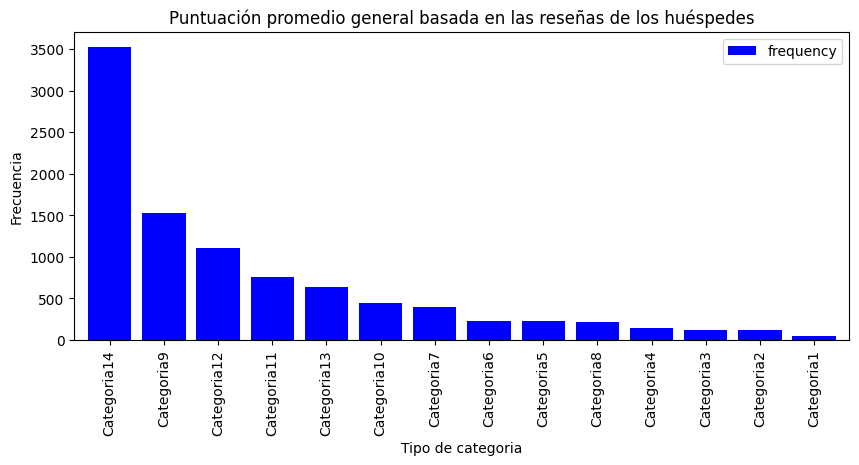

In [17]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Puntuación promedio general basada en las reseñas de los huéspedes')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')